# Exploratory Data Analysis (EDA) on Hotel Booking Dataset

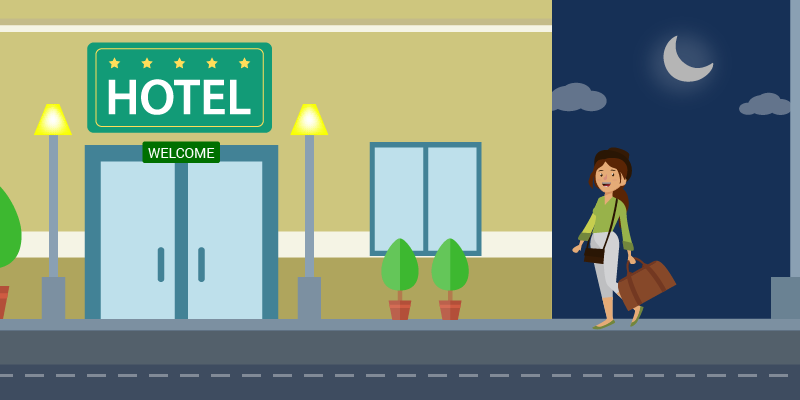

<b>You may have pondered, when is the ideal time of year to reserve a hotel room. Alternatively, the ideal stay period to obtain the greatest daily rate? What if you wanted to foretell whether a hotel would unreasonably frequently receive unusual requests? You can investigate those questions with the aid of our Hotel booking dataset!</b>

<b>This dataset contains booking information for a city hotel and a resort hotel,and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces.</b>

<b>The major goal of this project is to investigate and analyse data in order to identify significant elements that influence reservations and provide knowledge to hotel management so that it may implement various campaigns to increase sales and performance.</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("hotel_bookings.csv")

In [3]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Metadata

1. <b>hotel</b> : Hotel(Resort Hotel or City Hotel)            

2. <b>is_canceled</b> : Value indicating if the booking was canceled (1) or not (0)

3. <b>lead_time</b> : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

4. <b>arrival_date_year</b> : Year of arrival date

5. <b>arrival_date_month</b> : Month of arrival date

6. <b>arrival_date_week_number</b> : Week number of year for arrival date

7. <b>arrival_date_day_of_month</b> : Day of arrival date

8. <b>stays_in_weekend_nights</b> : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9. <b>stays_in_week_nights</b> : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10. <b>adults</b> : Number of adults

11. <b>children</b> : Number of children

12. <b>babies</b> : Number of babies

13. <b>meal</b> : Type of meal booked. Categories are presented in standard hospitality meal packages.

14. <b>country</b> : Country of origin.

15. <b>market_segment</b> : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16. <b>distribution_channel</b> : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17. <b>is_repeated_guest</b> : Value indicating if the booking name was from a repeated guest (1) or not (0)

18. <b>previous_cancellations</b> : Number of previous bookings that were cancelled by the customer prior to the current booking

19. <b>previous_bookings_not_canceled</b> : Number of previous bookings not cancelled by the customer prior to the current booking

20. <b>reserved_room_type</b> : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. <b>assigned_room_type</b> : Code for the type of room assigned to the booking.

22. <b>booking_changes</b> : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23. <b>deposit_type</b> : Indication on if the customer made a deposit to guarantee the booking.

24. <b>agent</b> : ID of the travel agency that made the booking

25. <b>company</b> : ID of the company/entity that made the booking or responsible for paying the booking.

26. <b>days_in_waiting_list</b> : Number of days the booking was in the waiting list before it was confirmed to the customer

27. <b>customer_type</b> : Type of booking, assuming one of four categories

28. <b>adr</b> : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. <b>required_car_parking_spaces</b> : Number of car parking spaces required by the customer

30. <b>total_of_special_requests</b> : Number of special requests made by the customer (e.g. twin bed or high floor)

31. <b>reservation_status</b> : Reservation last status, assuming one of three categories

* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why

32. <b>reservation_status_date</b> : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Cleaning the Dataset

In [6]:
# number of duplicate rows

df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

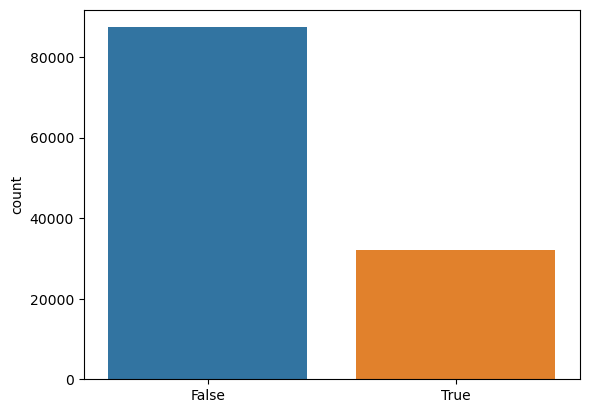

In [7]:
sns.countplot(df1.duplicated())
plt.show()

<b>As we can see, there are 31994 duplicate rows in our data.</b>

In [8]:
# Removing the duplicate rows

df1 = df1.drop_duplicates()

In [9]:
df1.shape

(87396, 32)

<b>Now, our dataset consists of 87396 rows and 32 columns.</b>

In [10]:
# Checking for total null values in each column

df1.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [11]:
# Percentage of null values in each column

print(100*(df1.isnull().sum()/len(df1.index)).sort_values(ascending=False))

company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

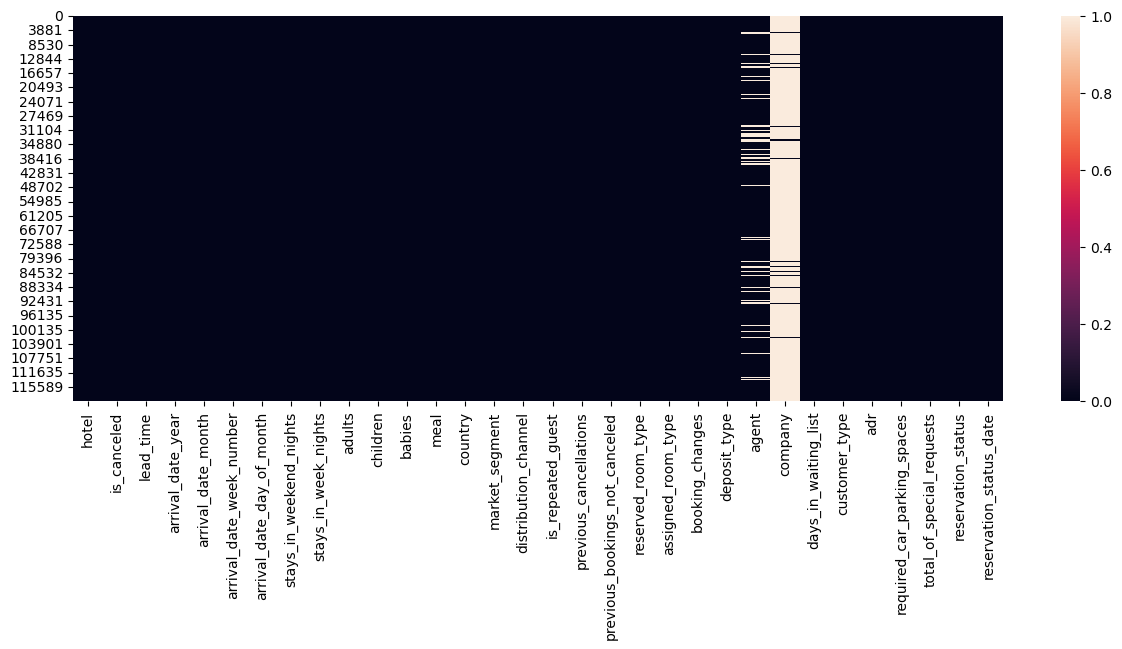

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.isnull())
plt.show()

In [13]:
# Before handling null values, first create a copy of original dataset.

df = df1.copy()

In [14]:
# Let's handle null values.
# The columns 'company' and 'agent' contain a large number of null values. So, let's replace all null values with 0.

df[['agent', 'company']] = df[['agent', 'company']].fillna(0.0)

In [15]:
# Let's replace all missing values of column 'children' with rounded mean value of that column.

df['children'].fillna(round(df1['children'].mean()), inplace = True)

In [16]:
# Now, let's replace NULL values of the column 'country' with mode of that column.

df['country'].fillna(df1['country'].mode().to_string(), inplace=True)

In [17]:
# Now let's check the null values again

df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

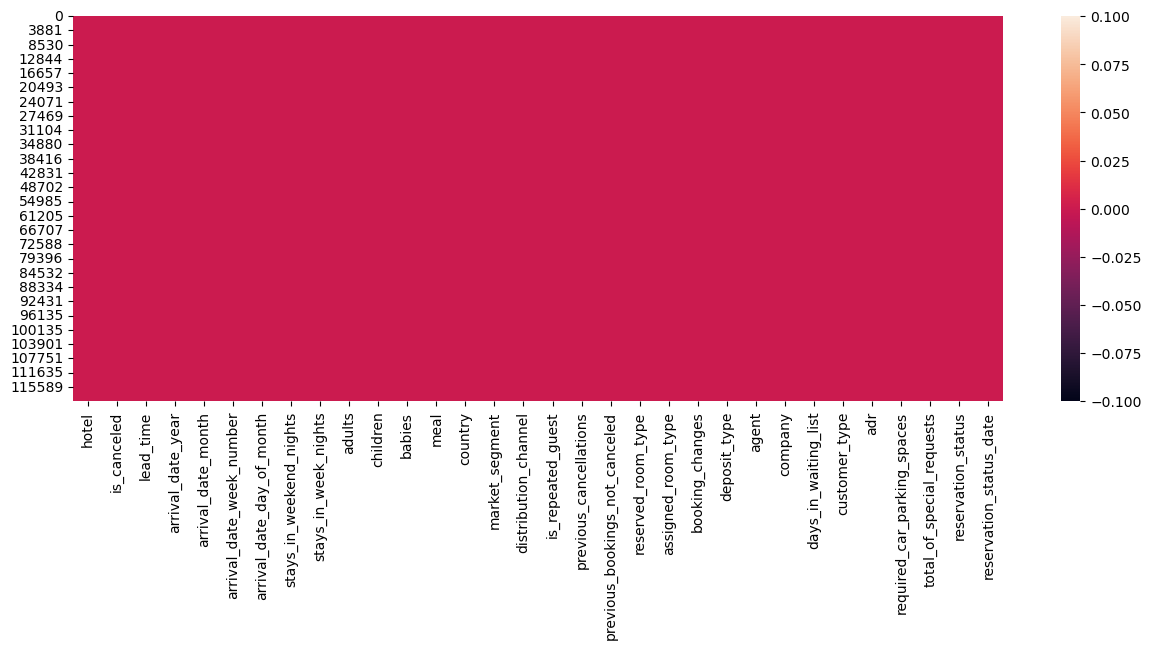

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

<b>As we can see, the null values have been treated.</b>

In [19]:
# Let's see the summary statistics of the numerical columns

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<b>As we can see, the minimum value of the column 'adr' is -6.380000 and the maximum value is 5400.000000. This means outliers are present in this column. so, let's remove the outliers.</b>

In [20]:
df = df[df['adr']<5000]

In [21]:
# Let's check again

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000
mean,0.274890,79.891882,2016.210298,26.838492,15.815436,1.005275,2.625413,1.875794,0.138635,0.010824,0.039075,0.030414,0.183992,0.271594,81.005447,11.016935,0.749574,106.276675,0.084227,0.698575
std,0.446461,86.052684,0.686106,13.674570,8.835142,1.031922,2.053588,0.626504,0.455874,0.113597,0.193776,0.369147,1.731903,0.727245,109.946019,54.047781,10.015788,52.018422,0.281535,0.831947
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


<b>As we can see, the maximum value of column 'adr' has been reduced to 510.</b>

In [22]:
# Let's explore the column 'adults'

df['adults'].value_counts()

2     64496
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [23]:
# Let's explore the column 'children'

df['children'].value_counts()

0.0     79031
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [24]:
# Let's explore the column 'babies'

df['babies'].value_counts()

0     86481
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

<b>There are many rows that have zero guests including adults, children and babies.</b>       
<b>We need to remove those rows because they do not make any sense.</b>

In [25]:
# Dropping the records where no bookings were made

df.drop(df[df['adults']+df['babies']+df['children']==0].index,inplace=True)

# Adding new column of Total People and Total Stay

In [26]:
df['total_people'] = df['adults']+df['babies']+df['children']
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [27]:
df.shape

(87229, 34)

<b>Now, we are left with 87229 rows and 34 columns.</b>

# Exploratory Data Analysis (EDA)

# Univariate Analysis

# 1. What kind of hotels are most popular among visitors?

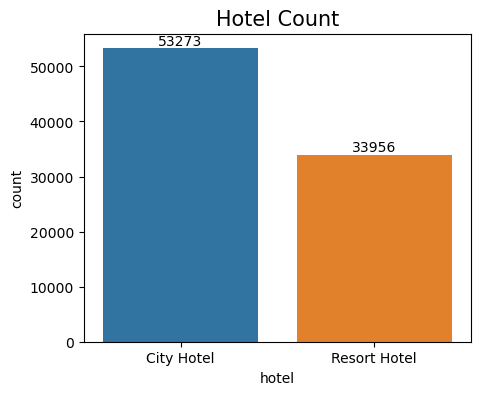

In [28]:
hotel_count = df.groupby(['hotel'])['hotel'].agg({'count'}).reset_index()
hotel_count

plt.figure(figsize=(5,4))
ax=sns.barplot(x="hotel",y="count",data=hotel_count)
ax.bar_label(ax.containers[0])

plt.title("Hotel Count",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Most Reserved Hotel')

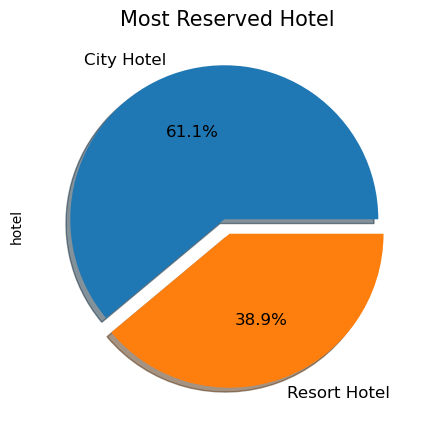

In [29]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(5,5),fontsize=12)   
plt.title('Most Reserved Hotel',fontsize=15)

<b>As we can see, City Hotels are more preferred as compared to Resort Hotels.</b>

# 2. Which agent secured the most bookings?

In [30]:
# Highest bookings made by agents

highest_bookings = df.groupby(['agent'])['agent'].agg({'count'}).rename(columns={'count': "Most_Bookings" }).reset_index().sort_values(by='Most_Bookings',ascending=False)
highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
0,0.0,12141
14,14.0,3342
7,7.0,3294
...,...,...
194,267.0,1
65,73.0,1
251,352.0,1
193,265.0,1


In [31]:
# As we previously replaced the null values with 0, as it indicates no bookings,
# So we have to drop this 0 agent row.

highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

highest_bookings.head()

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779


In [32]:
#top 10 agents

top_ten_highest_bookings = highest_bookings[:10]
top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Top Ten Agents with the Most Bookings ')

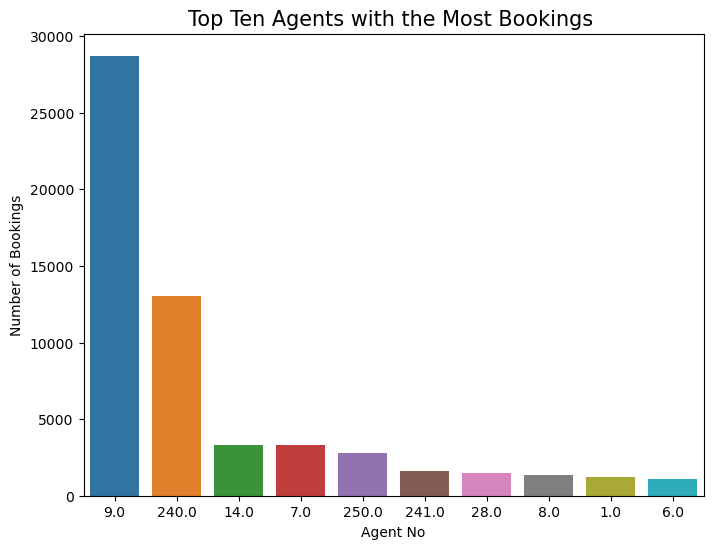

In [33]:
#plotting the graph

plt.figure(figsize=(8,6))
sns.barplot(x='agent',y="Most_Bookings",data=top_ten_highest_bookings,order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Top Ten Agents with the Most Bookings ",fontsize=15)

<b>As we can, Agent 9 has most number of bookings.</b>

# 3. Cancelation Percentage

Text(0.5, 1.0, 'Cancellation vs non Cancellation')

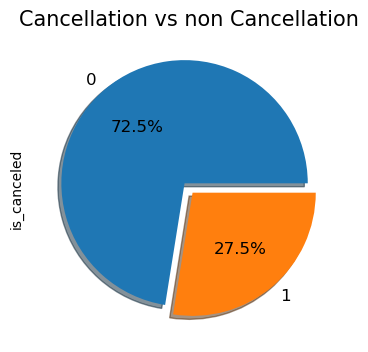

In [34]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05],autopct='%0.1f%%',shadow=True, figsize=(5,4),fontsize=12)

plt.title("Cancellation vs non Cancellation",fontsize=15)

<b>As we can see, around 27.5% of the reservations were cancelled.</b>

# 4. What is the Percentage of repeated guests?

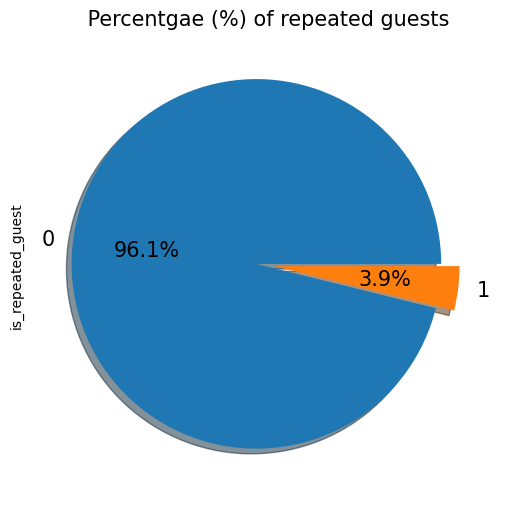

In [35]:
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%0.1f%%',shadow=True,figsize=(6,6),fontsize=15)

plt.title(" Percentgae (%) of repeated guests",fontsize=15)
plt.show()

<b>Only 3.9% of visitors are repeat their visit, which is quite small.</b>

<b>Management needs to listen to customer feedback in order to improve services and keep customers.</b>

# 5. What is the "Customer Type" distribution in percentages?

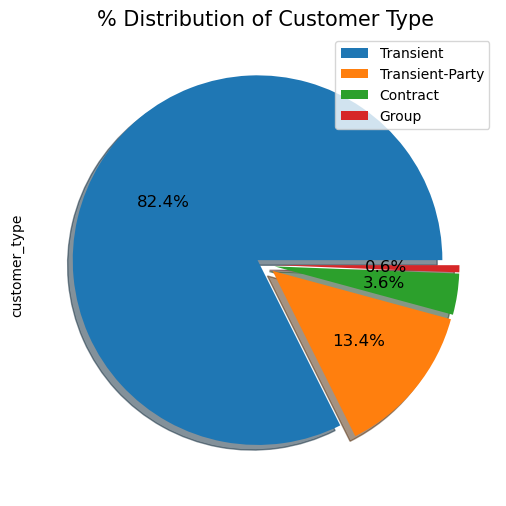

In [36]:
df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12,labels=None)

labels=df['customer_type'].value_counts().index
plt.legend(loc='upper right', labels=labels)
plt.title('% Distribution of Customer Type',fontsize=15)
plt.show()

* Contract : when the booking has an allotment or other type of contract associated to it
* Group : when the booking is associated to a group
* Transient : when the booking is not part of a group or contract, and is not associated to other transient booking
* Transient-party : when the booking is transient, but is associated to at least other transient booking

<b>The percentage of transient customers is higher at 82.4%. A very small fraction of Bookings are connected to the Group.</b>

# 6. Percentage distribution of required car parking spaces?

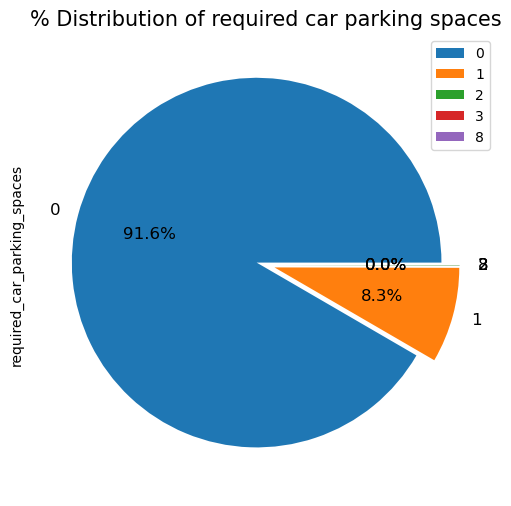

In [37]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(6,6),fontsize=12)

labels=df['required_car_parking_spaces'].value_counts().index
plt.legend(loc='upper right', labels=labels)
plt.title('% Distribution of required car parking spaces',fontsize=15)
plt.show()

<b>The parking space was not needed by 91.6% of the visitors. 8.3% of visitors only needed one parking space.</b>

# 7. What percentage of customer-made changes to bookings?

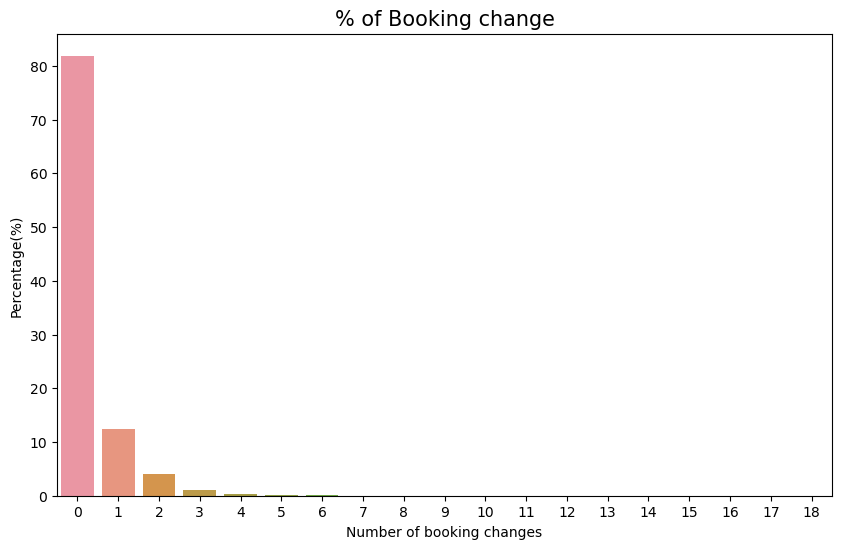

In [38]:
booking_changes = df["booking_changes"].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

#Plotting the graph

plt.figure(figsize=(10,6))
sns.barplot(x=booking_changes['number_booking_changes'],y=booking_changes['Counts']*100/df.shape[0])
plt.title("% of Booking change",fontsize=15)
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')
plt.show()

* 0 = 0 changes made in the booking 
* 1 = 1 changes made in the booking 
* 2 = 2 changes made in the booking

<b>As we can see, more than 80% of the bookings were not changed by the customers.</b>

# 8. Which cuisine is most popular among the visitors?

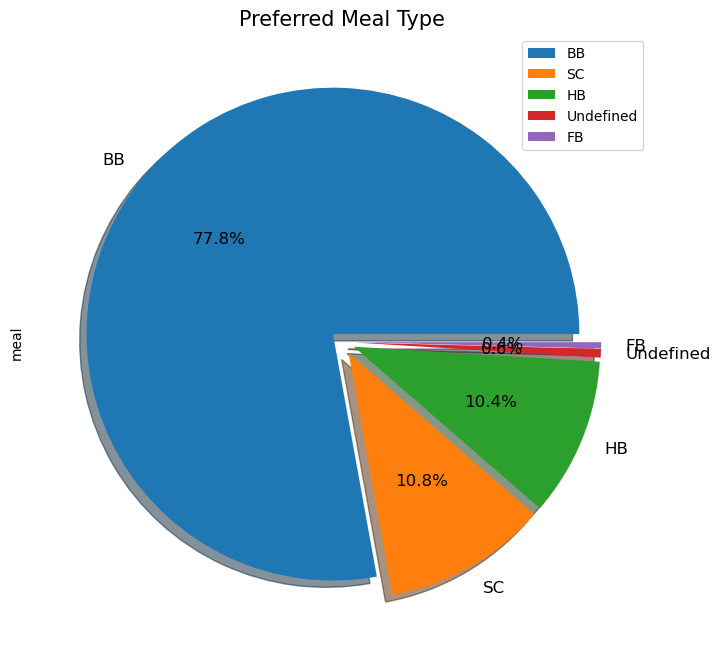

In [39]:
df['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8),fontsize=12)

labels=df['meal'].value_counts().index
plt.legend(loc='upper right', labels=labels)
plt.title("Preferred Meal Type",fontsize=15)
plt.show()

<b>As we can see, bed and breakfast(BB) is the most popular sort of meal among the visitors.</b>      
<b>We can also see that, HB(Half Board) and SC(Self Catering) are equally desirable.</b>

# 9. What is the Deposite type's percentage distribution?

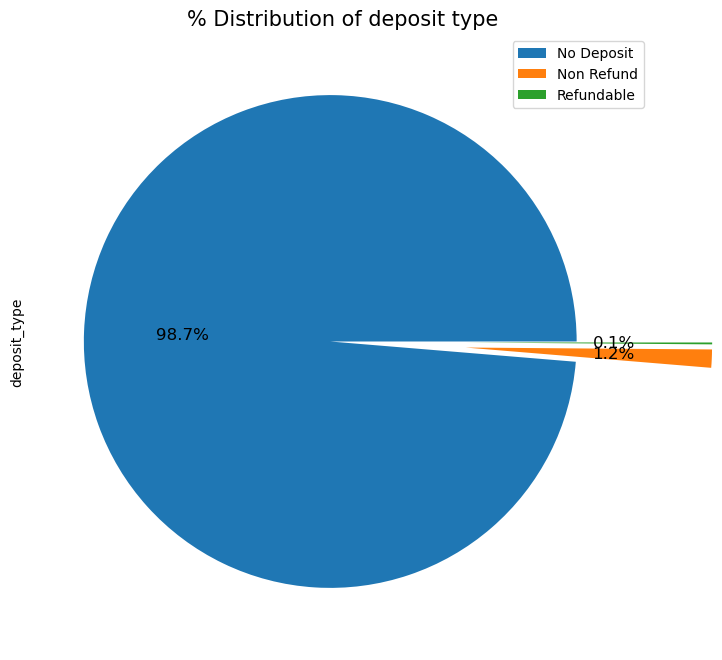

In [40]:
df['deposit_type'].value_counts().plot.pie(explode=(0.05,0.5,0.5),autopct='%1.1f%%',shadow=False,figsize=(8,8),fontsize=12,labels=None)

plt.title("% Distribution of deposit type",fontsize=15)
labels=df['deposit_type'].value_counts().index
plt.legend(loc='upper right', labels=labels)
plt.show()

<b>As we can see, 98.7% visitors prefer "No deposit" types of deposit, which means the customer made no deposit to guarantee the booking.</b>

# 10. Top ten countries from which the most visitors arrive

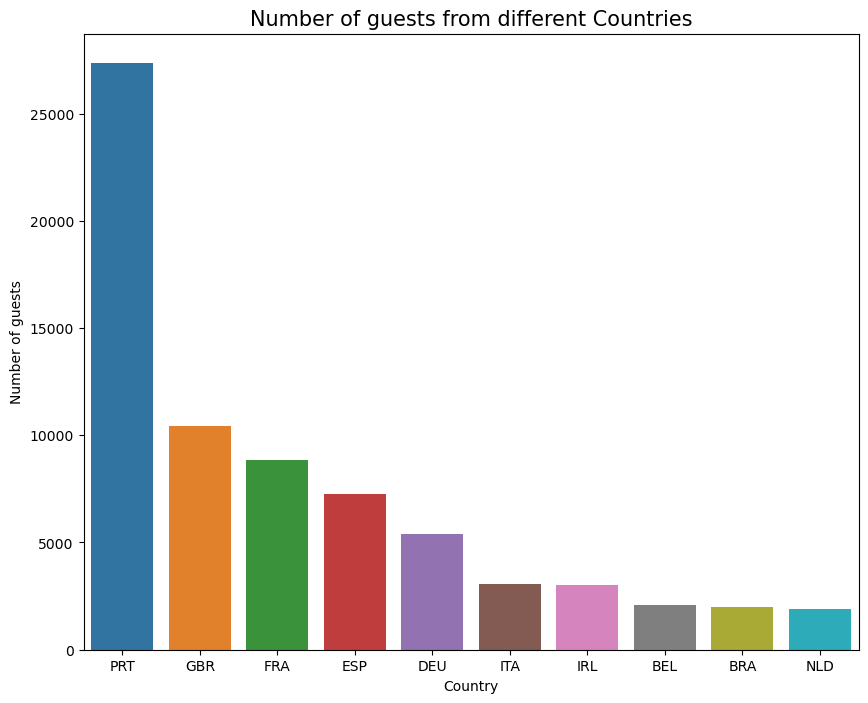

In [41]:
top_10_country=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

# Plotting the graph
plt.figure(figsize=(10,8))
sns.barplot(x='country',y='count of guests',data=top_10_country)
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title("Number of guests from different Countries",fontsize=15)
plt.show()

* Top 10 Countries are :     
PRT- Portugal           
GBR- United Kingdom        
FRA- France      
ESP- Spain      
DEU - Germany       
ITA -Itlay         
IRL - Ireland       
BEL -Belgium       
BRA -Brazil      
NLD-Netherlands

<b>As we can see, majority of the visitors are from Portugal.</b>.

# 11. Which kind of room is most popular among customers?

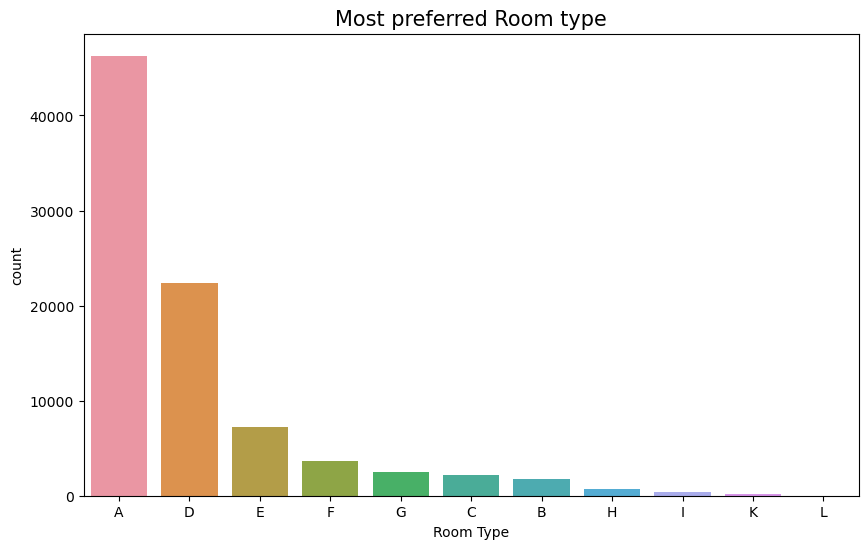

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='assigned_room_type',data=df,order=df['assigned_room_type'].value_counts().index)
plt.xlabel('Room Type')
plt.title("Most preferred Room type",fontsize=15)
plt.show()

<b>As we can see, the most preferred Room type is "A".</b>

# 12. Which month received the most reservations?

In [43]:
#groupby arrival_date_month and taking the hotel count
bookings_by_months = df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# developing a df that will maintain the above months list's order without altering its values. 
bookings_by_months['arrival_date_month'] = pd.Categorical(bookings_by_months['arrival_date_month'],categories=months,ordered=True)

#sorting by arrival_date_month
bookings_by_months = bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7488
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


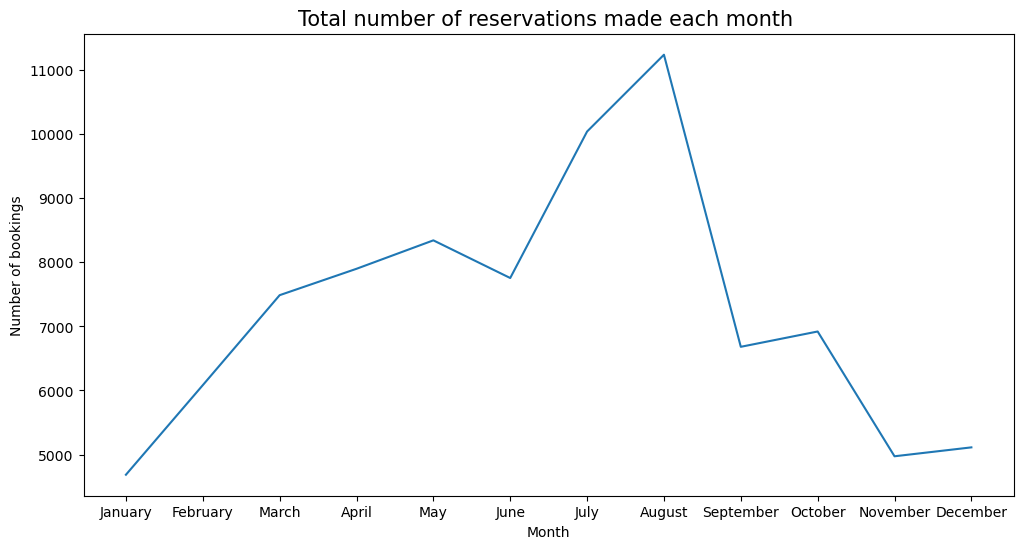

In [44]:
# Plotting the graph

plt.figure(figsize=(12,6))
sns.lineplot(x="arrival_date_month",y="Counts",data=bookings_by_months)
plt.title('Total number of reservations made each month ',fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.show()

<b>As we can see, July and August had the most number of bookings.</b>

# 13. Which distribution method is most popular for hotel reservations?

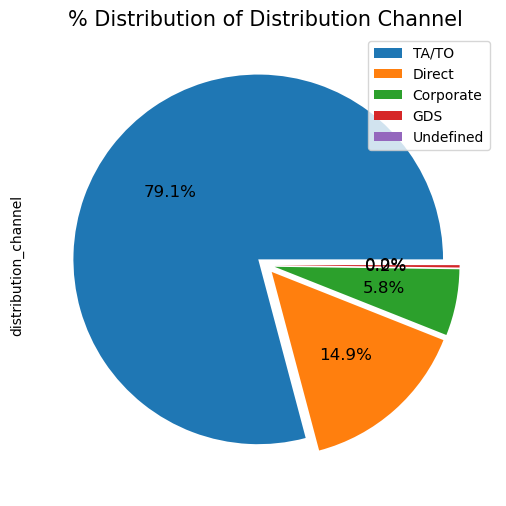

In [45]:
df['distribution_channel'].value_counts().plot.pie(explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(6,6),fontsize=12,labels=None)


plt.title("% Distribution of Distribution Channel",fontsize=15)
labels=df['distribution_channel'].value_counts().index
plt.legend(loc='upper right', labels=labels)
plt.show()

* Corporate - These are corporate hotel booing companies which makes bookings possible.
* GDS - A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct - means that bookings are directly made with the respective hotels
* TA/TO - means that bookings are made through travel agents or travel operators.
* Undefined - Bookings are undefined. may be customers made their bookings on arrival.

<b>As we can see, majority of the times, the bookings are made through travel agents or travel operators.</b>

# 14. In which year were the most reservations made?

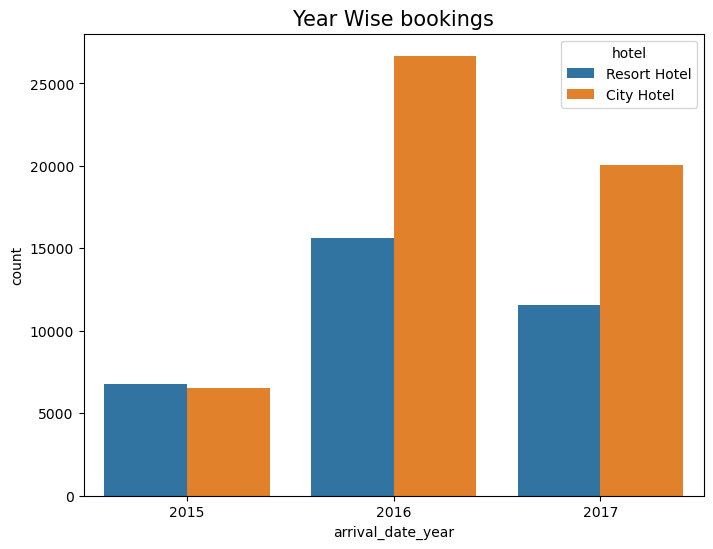

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings",fontsize="15")
plt.show()

<b>As we can see, City Hotels had most of the bookings in the years 2016 and 2017.</b>      
<b>The bookings in Resort Hotels were slightly higher than City Hotels in the year 2015.</b>          

# 15. How many guests are not allotted with the same room type which was reserved by them?

In [47]:
# Creating a function If the allocated room type and the reserved room type are the same. 

def same_room_allotment(x):
    if x['reserved_room_type'] != x['assigned_room_type']:
        return 1
    else:
        return 0

In [48]:
# adding new column

df['Same_room_alloted_or_not']=df.apply(lambda x: same_room_allotment(x),axis=1)

In [49]:
df['Same_room_alloted_or_not'].value_counts()

0    74239
1    12990
Name: Same_room_alloted_or_not, dtype: int64

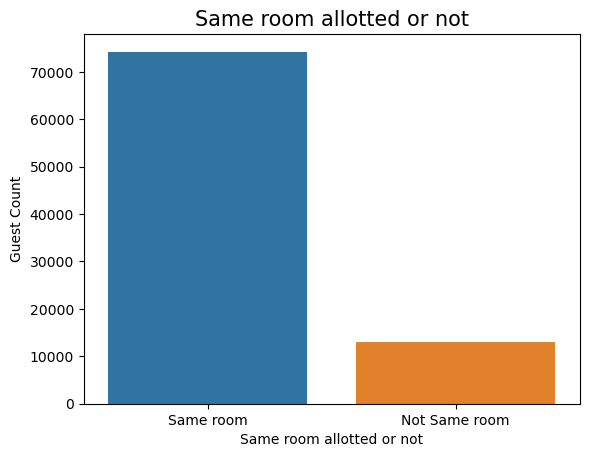

In [50]:
# Plotting the graph

sns.countplot(df['Same_room_alloted_or_not'])
plt.title("Same room allotted or not",fontsize="15")
plt.xlabel('Same room allotted or not')
plt.ylabel('Guest Count')
plt.xticks([0,1],['Same room','Not Same room'])
plt.show()

<b>As we can see, majority of the guests are allotted with the same room type which was reserved by them.</b>

# Bivariate and Multivariate Analysis

# 1. What kind of hotel has the highest ADR?

In [51]:
# Grouping by hotel adr

highest_adr = df.groupby(['hotel'])['adr'].mean().reset_index()
highest_adr

,hotel,adr
0,City Hotel,111.172693
1,Resort Hotel,99.059517


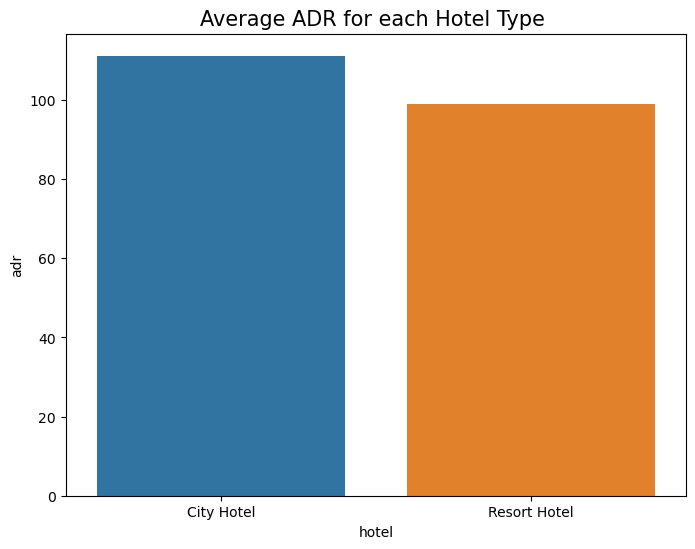

In [52]:
# Plotting the graph

plt.figure(figsize=(8,6))
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])
plt.title("Average ADR for each Hotel Type ",fontsize=15)
plt.show()

<b>The highest ADR is at City Hotels. This indicates that City Hotels make more money than Resort Hotels.</b>

# 2. Which hotel category has the more average lead time?

In [53]:
# Group by hotel

group_by_hotel = df.groupby('hotel')

In [54]:
avg_lead_time = group_by_hotel['lead_time'].mean().reset_index()
avg_lead_time

,hotel,lead_time
0,City Hotel,77.794061
1,Resort Hotel,83.387737


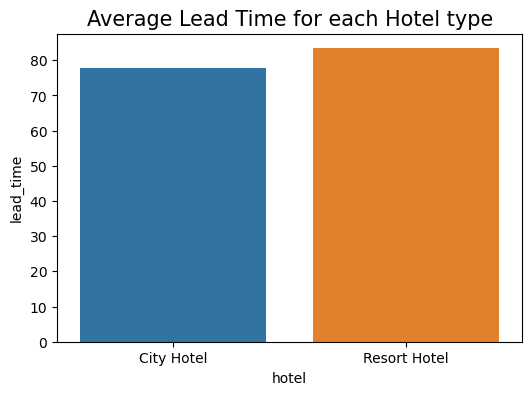

In [55]:
# Plotting the graph

plt.figure(figsize=(6,4))
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
plt.title("Average Lead Time for each Hotel type",fontsize=15)
plt.show()

<b>Hotel resorts have a slightly longer average lead time. Customers must make very early travel plans as a result.</b>

# 3. Which hotel experiences the highest rate of cancellations?

* booking canceled = 1
* booking not canceled = 0

In [56]:
# creating new DataFrame where bookings are cancelled.
cancelled_df = df[df['is_canceled']==1]

# Grouping by hotel
cancelled_df = cancelled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})


# Adding 'total booking column for calculating the percentage.
cancelled_df['total_bookings'] = df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
cancelled_df

,hotel,no_of_cancelled_bookings,total_bookings
0,City Hotel,16034,53273
1,Resort Hotel,7974,33956


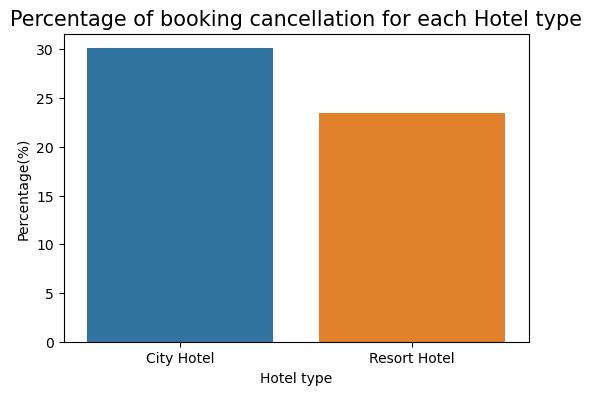

In [57]:
# Plotting the barchat

plt.figure(figsize=(6,4))
sns.barplot(x=cancelled_df['hotel'],y=100*cancelled_df['no_of_cancelled_bookings']/cancelled_df['total_bookings'])

plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation for each Hotel type",fontsize=15)
plt.show()

<b>City Hotels experience the highest rate of cancellations.</b>

# 4. Which hotel has longer waiting time?

In [58]:
# Grouping by hotel and taking averge of days in waiting list

waiting_time_df = df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
waiting_time_df

,hotel,days_in_waiting_list
0,City Hotel,1.020085
1,Resort Hotel,0.316763


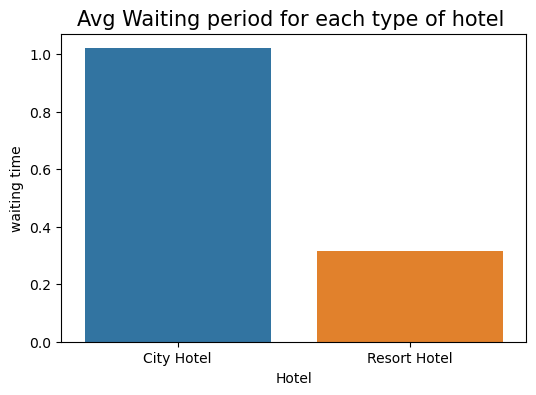

In [59]:
# Plotting the graph

plt.figure(figsize=(6,4))

sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

plt.xlabel('Hotel')
plt.ylabel('waiting time')
plt.title("Avg Waiting period for each type of hotel ",fontsize=15)
plt.show()

<b>As we can see, waiting time is more in City Hotels.</b>        
<b>Thus, we can conclude that City Hotels are significantly busier than Resort Hotels.</b>

# 5. Which hotels receive the most return visitors?

* repeated guest = 1
* not repeated guest = 0

In [60]:
# Groupby hotel

repeated_guests_df = df[df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})
repeated_guests_df

,hotel,number_of_repated_guests
0,City Hotel,1657
1,Resort Hotel,1707


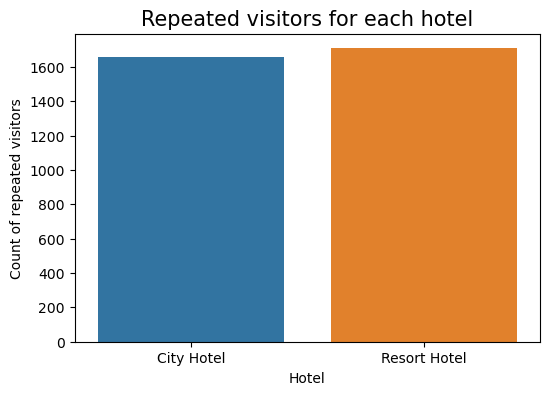

In [61]:
# Plotting bar plot

plt.figure(figsize=(6,4))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

plt.xlabel('Hotel')
plt.ylabel('Count of repeated visitors')
plt.title("Repeated visitors for each hotel",fontsize=15)
plt.show()

<b>Return visitors are slightly higher in Resort Hotels as compared to City Hotels.</b>

# 6. ADR compared between several months.

In [62]:
# Group by month and hotel type
bookings_by_months_df = df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()


# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Order of the month list in the df along with values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)

# S the value based on month
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,94.096062
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


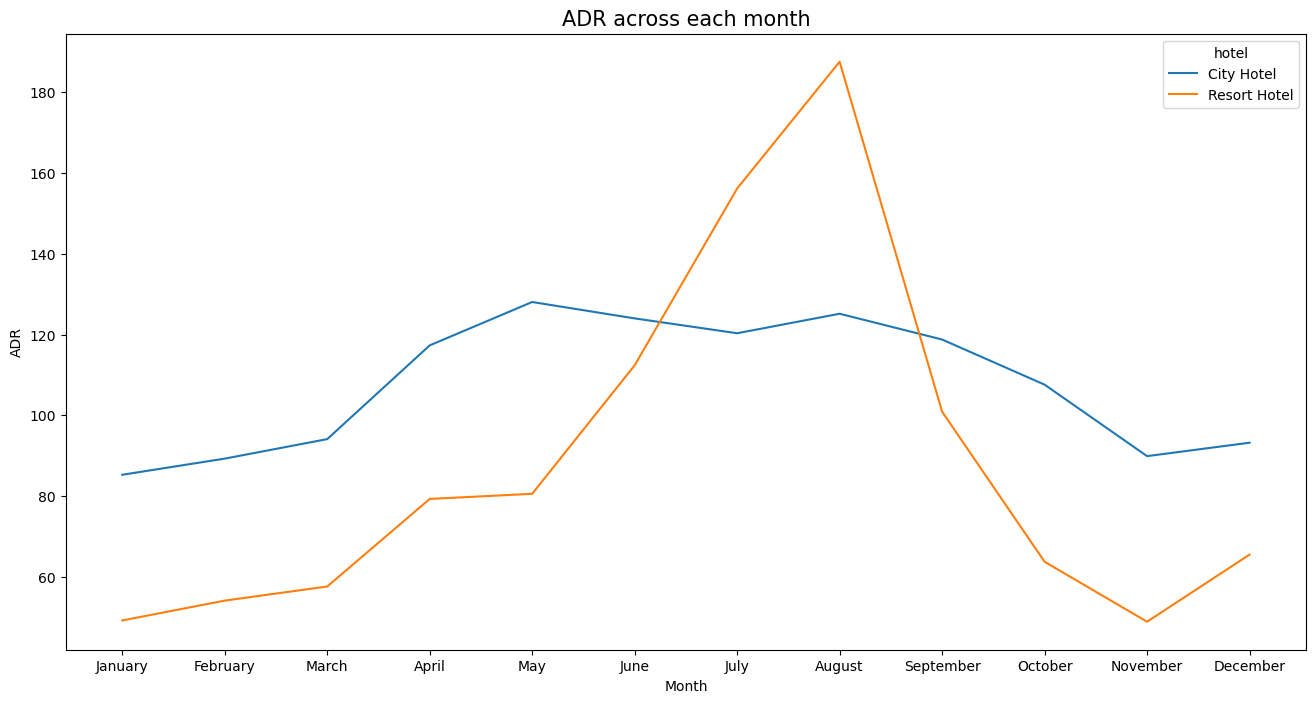

In [63]:
# Plotting line graph 

plt.figure(figsize=(16,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month',fontsize=15)
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

<b>As we can see, in comparison to City Hotels, the ADR for Resort Hotels is higher in the months of July and August.</b>

<b>We can also see that January, February, March, April, October, November, and December have low average daily rate. thus, these are the ideal months for visiting the Hotels.</b>

# 7. ADR across Distribution Channel

In [64]:
# Group by distribution channel and hotel

distribution_channel_adr = df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel_adr

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.544578
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


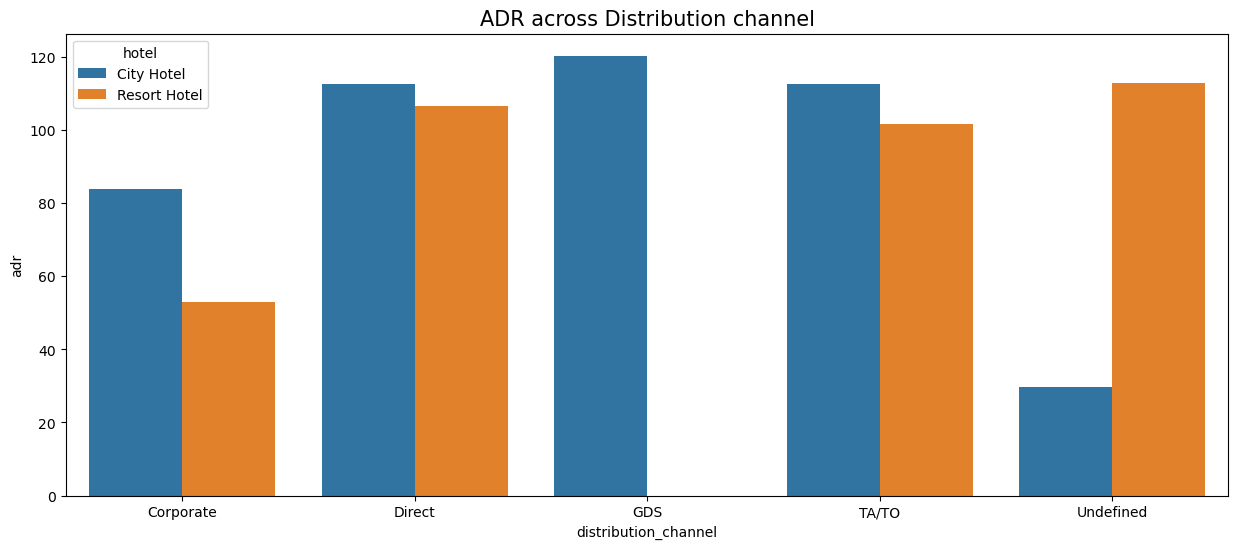

In [65]:
# Plotting the graph

plt.figure(figsize=(15,6))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_adr, hue='hotel')
plt.title('ADR across Distribution channel',fontsize=15)
plt.show()

<b>"Direct" and "TA/TO" has almost equal ADR in both type of Hotels. This indicates that "Direct" and "TA/TO" are outperforming the other channels in terms of revenue generation.</b>


<b>GDS scores highly in the "City Hotel" category. Bookings for Resort Hotels must rise at GDS.</b>

# 8. ADR across Different Market Segment

In [66]:
# Groupby market segment and hotel

market_seg_adr = df.groupby(['market_segment','hotel'])['adr'].mean().reset_index()
market_seg_adr

,market_segment,hotel,adr
0,Aviation,City Hotel,100.613628
1,Complementary,City Hotel,2.802048
2,Complementary,Resort Hotel,3.868466
3,Corporate,City Hotel,83.020234
4,Corporate,Resort Hotel,51.920873
5,Direct,City Hotel,121.243682
6,Direct,Resort Hotel,112.827406
7,Groups,City Hotel,85.262047
8,Groups,Resort Hotel,63.688498
9,Offline TA/TO,City Hotel,86.898312


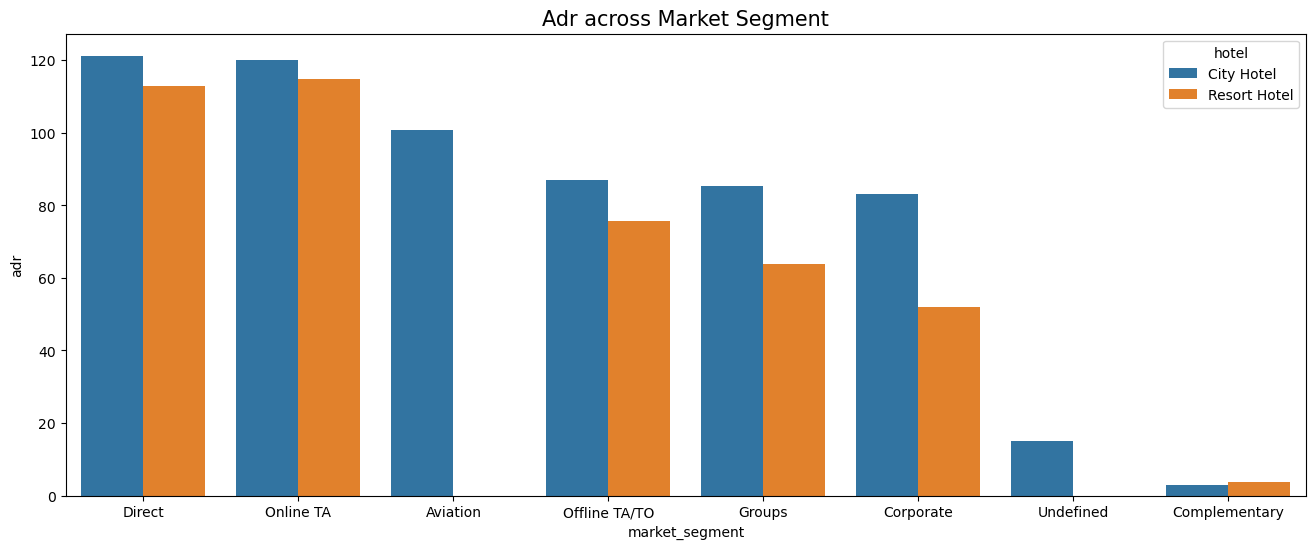

In [67]:
# Plotting barchart

plt.figure(figsize=(16,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=market_seg_adr.sort_values(by='adr',ascending=False))
plt.title('Adr across Market Segment',fontsize=15)
plt.show()

<b>In both types of hotels, "Direct" and "Online TA" are making the most contributions.</b>

# 9. The relationship between ADR and Length of stay

In [68]:
# Groupby adr,total,stay

adr_vs_stay = df.groupby(['total_stay'])["adr"].mean().reset_index()
adr_vs_stay.head()

,total_stay,adr
0,0,0.000000
1,1,96.096107
2,2,106.325130
3,3,110.941067
4,4,109.269494


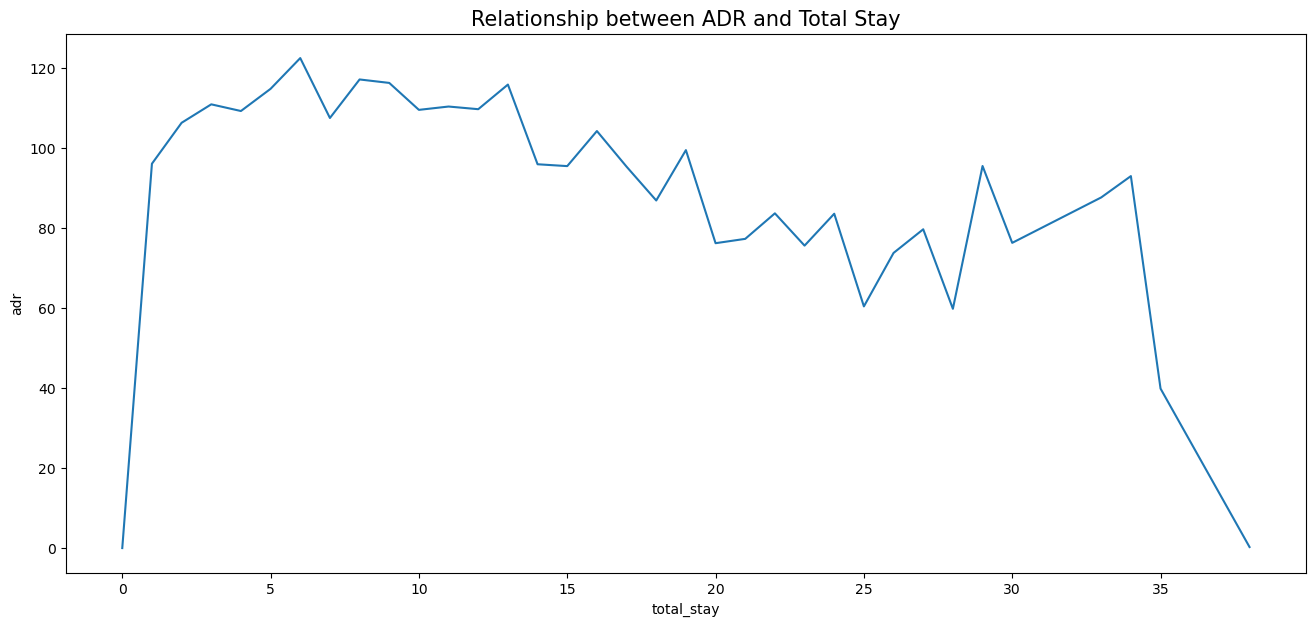

In [69]:
plt.figure(figsize=(16,7))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay[0:35])
plt.title('Relationship between ADR and Total Stay',fontsize=15)
plt.show()

<b>The average daily rate rises along with the length of stay. However, the ADR decreases if a guest stays for a longer time.</b>

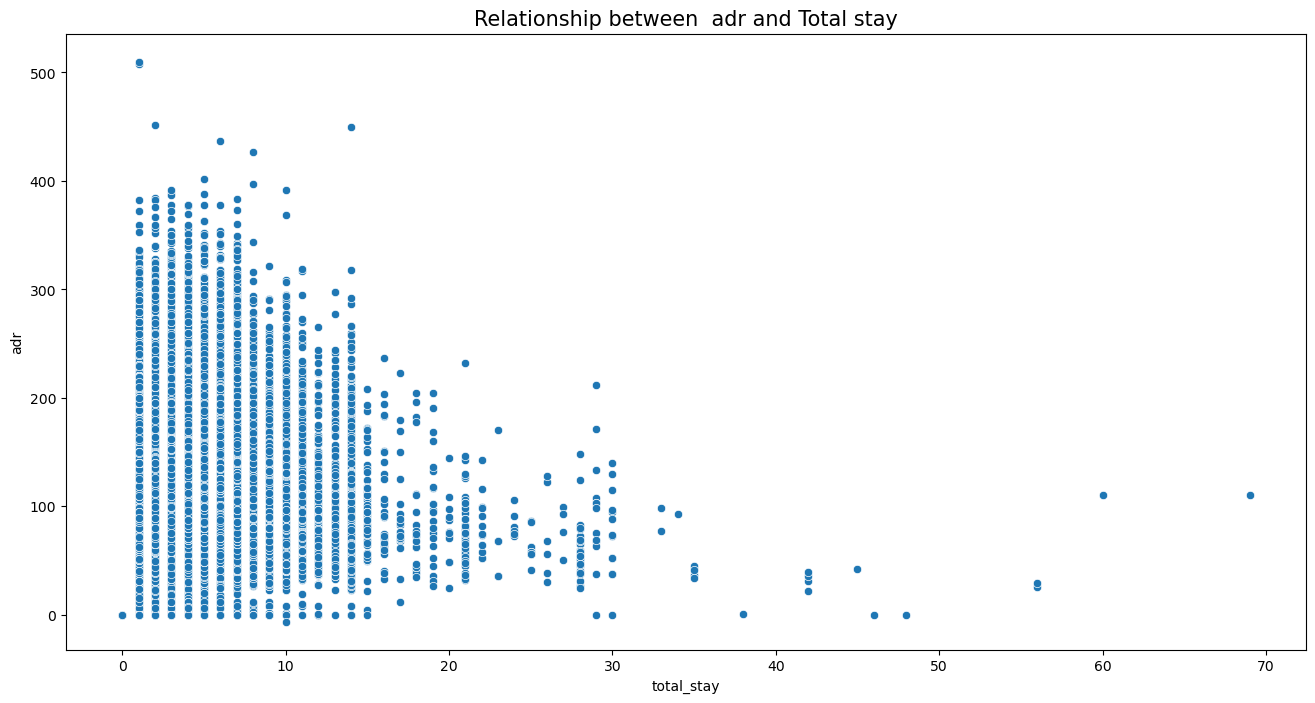

In [70]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='total_stay',y='adr',data=df)
plt.title('Relationship between  adr and Total stay',fontsize=15)
plt.show()

<b>We can infer from the aforementioned dispersion that adr is decreasing as stay rises. Therefore, customers can get good adr for longer stays.</b>

# 10. Relationship between ADR and Total number of people

In [71]:
#creating new dataframe where "Total number of people is less than 6"

df2 = df[df['total_people'] < 6]

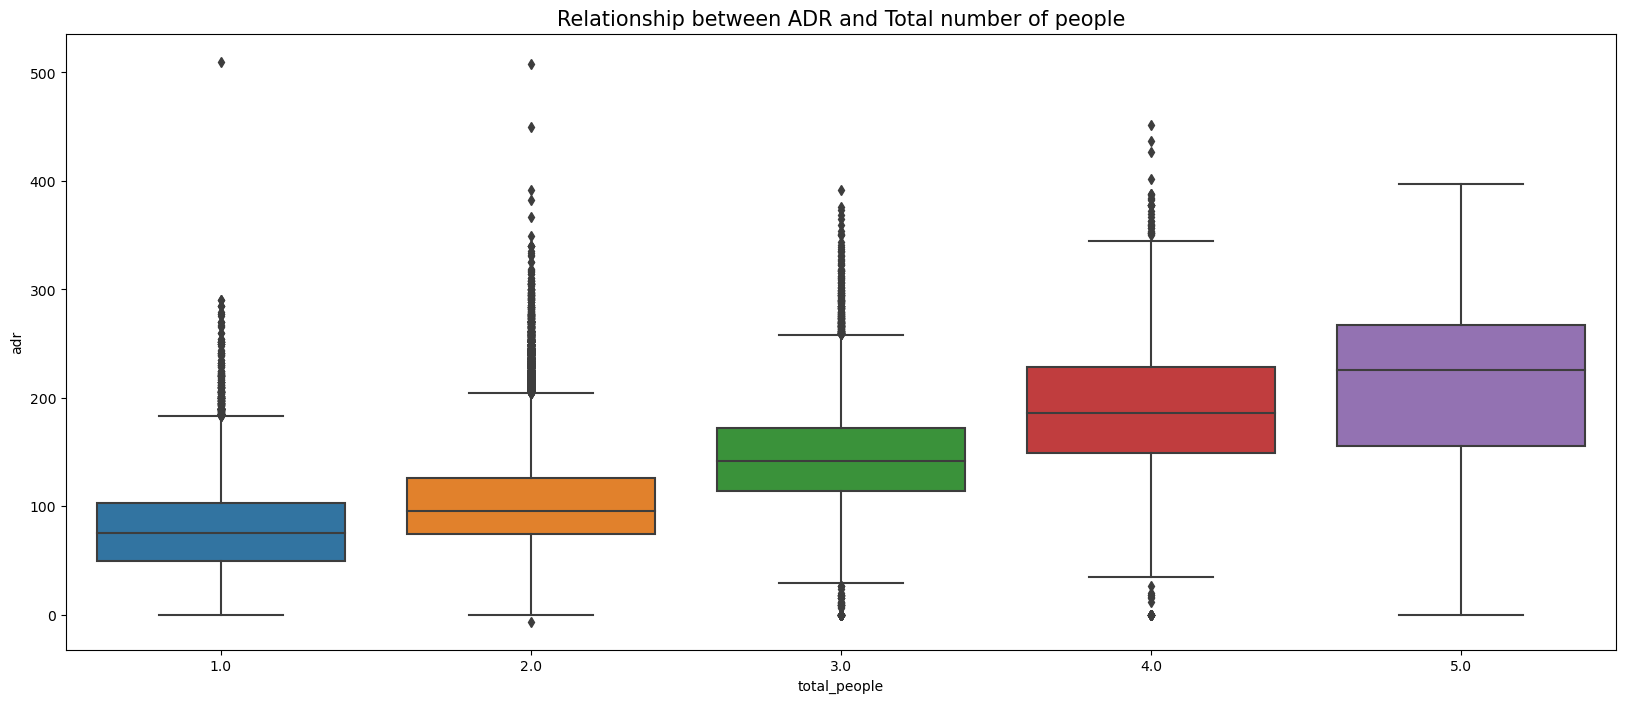

In [72]:
#plotting the graph

plt.figure(figsize=(20,8))
sns.boxplot(x='total_people',y='adr',data=df2)

plt.title('Relationship between ADR and Total number of people',fontsize=15)
plt.show()

<b>As we can see, ADR also rises in proportion to the Total number of people.</b>

# 11. Which type of Distribution Channel has the highest cancellation count?

In [73]:
# Creating a new dataFrame where bookings are cancelled.
cancelled_df_DC = df[df['is_canceled']==1]

# Group by distribution channel
cancelled_df_DC=cancelled_df_DC.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
cancelled_df_DC

,distribution_channel,hotel,Counts
0,Corporate,City Hotel,330
1,Corporate,Resort Hotel,316
2,Direct,City Hotel,971
3,Direct,Resort Hotel,952
4,GDS,City Hotel,36
5,TA/TO,City Hotel,14693
6,TA/TO,Resort Hotel,6706
7,Undefined,City Hotel,4


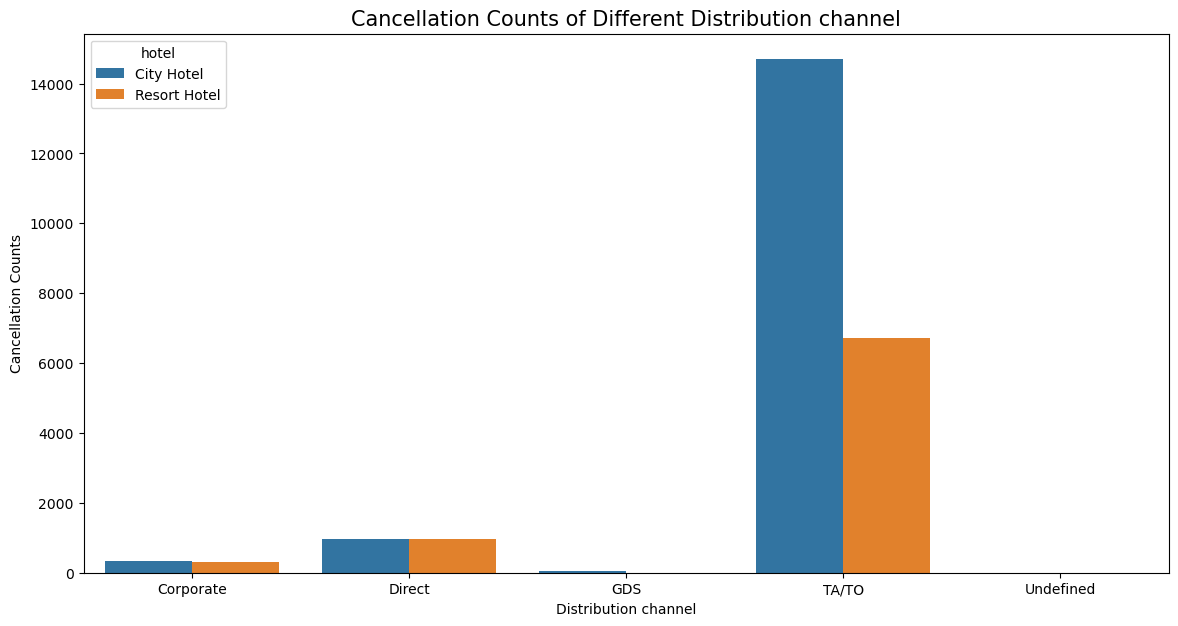

In [74]:
# Plotting the graph

plt.figure(figsize=(14,7))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data = cancelled_df_DC)

plt.xlabel('Distribution channel')
plt.ylabel('Cancellation Counts')
plt.title('Cancellation Counts of Different Distribution channel',fontsize=15)
plt.show()

<b>As we can see, City Hotels have high cancellation rates as compared to Resort Hotels, when the bookings are made through travel agents or travel operators.</b>

# 12. Which type of market segment's has the highest Cancellation Count ?

In [75]:
# Creating a new dataframe where bookings are cancelled

market_segment_df = df[df['is_canceled']==1]

# Group by market segment and hotel

market_segment_df = market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})
market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1256


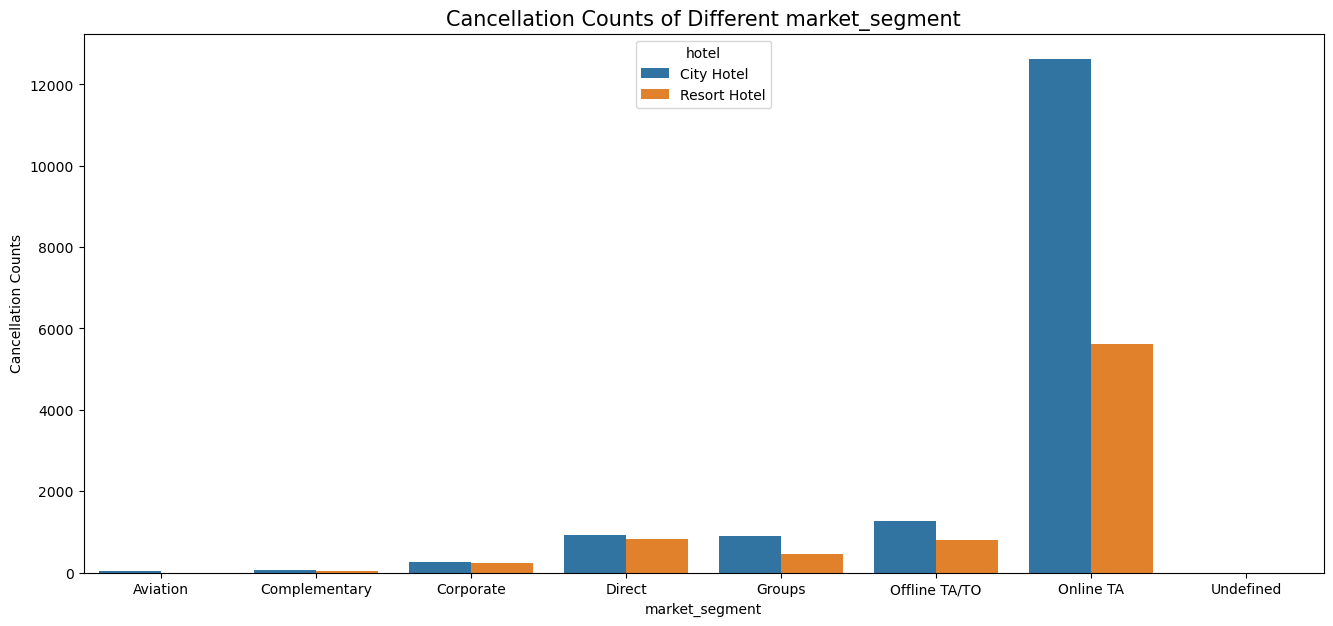

In [76]:
# Plotting the graph

plt.figure(figsize=(16,7))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

plt.xlabel('market_segment')
plt.ylabel('Cancellation Counts')
plt.title('Cancellation Counts of Different market_segment',fontsize=15)
plt.show()

<b>As we can see, Online T/A has the highest cancellation in both type of Hotels.</b>

# 13. What is the Total stay length in each Hotel type ?

In [77]:
# Group by Total stay and hotel type

day_count = df.groupby(['total_stay', 'hotel']).agg('count').reset_index().iloc[:, :3].rename(columns={'is_canceled':'Number of stays'})
day_count.head(10)

,total_stay,hotel,Number of stays
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10269
3,1,Resort Hotel,6899
4,2,City Hotel,10813
5,2,Resort Hotel,4921
6,3,City Hotel,13542
7,3,Resort Hotel,4285
8,4,City Hotel,9610
9,4,Resort Hotel,3955


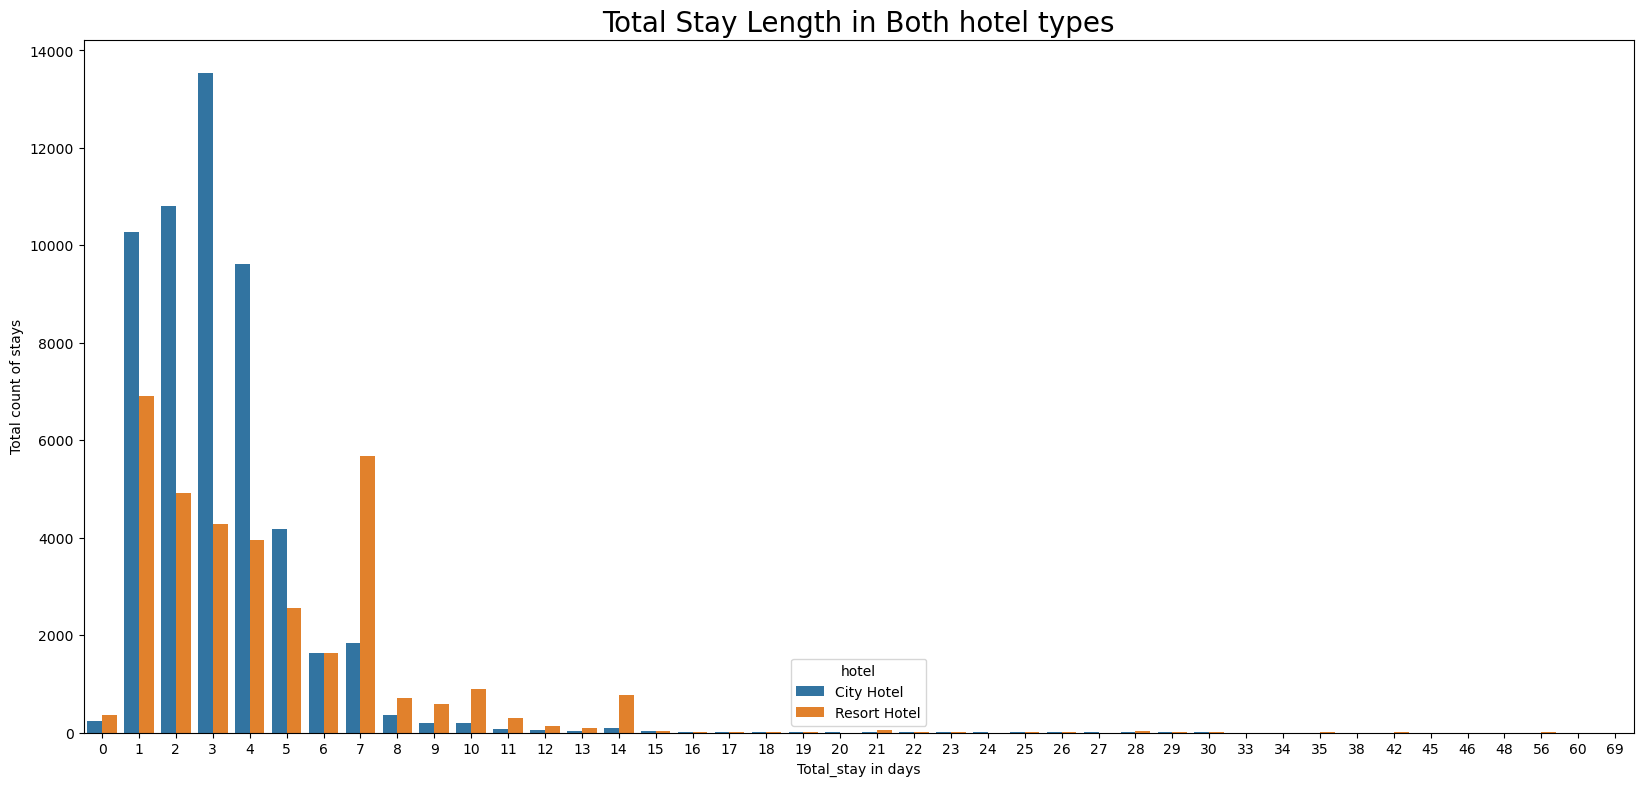

In [78]:
# Plotting the graph

plt.figure(figsize=(20,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=day_count)

plt.xlabel('Total_stay in days')
plt.ylabel('Total count of stays')
plt.title('Total Stay Length in Both hotel types',fontsize=20)
plt.show()

<b>The ideal stay in either sort of hotel is under seven days.</b>

# 14. Relationship between returning visitors and cancelled reservations.

Text(0.5, 1.0, 'Relationship Between repeated guests and previous bookings not cancelled')

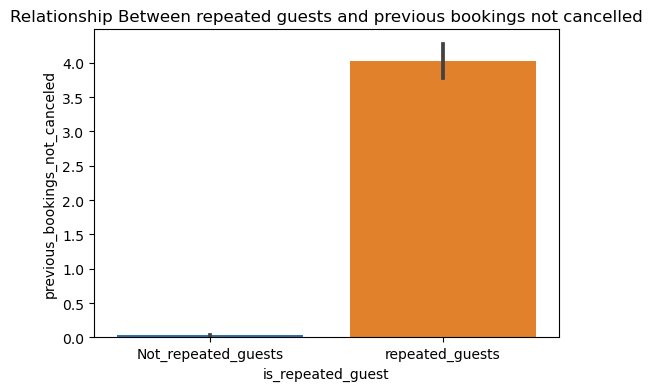

In [79]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_repeated_guest',y= 'previous_bookings_not_canceled',data=df)
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=10)
plt.title('Relationship Between repeated guests and previous bookings not cancelled',fontsize=12)

* previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking.

<b>As we can see, booking cancellations are more common among non-repeat visitors.</b>

# 15. The correlation between booking cancellation and the percentage of guests who are not assigned to the same room that they reserved.

In [80]:
# Group by is_canceled

grp_by_canceled = df.groupby('is_canceled')

In [81]:
# Create DF and calculate  percentage of guests who are not assigned to the same room that they reserved.

DF = pd.DataFrame(grp_by_canceled['Same_room_alloted_or_not'].sum()*100/grp_by_canceled.size()).rename(columns={0:"percentage"})
DF

,percentage
is_canceled,
0,19.572610
1,2.565811


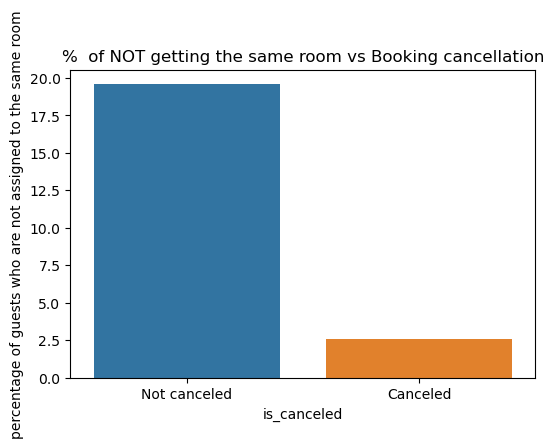

In [82]:
plt.figure(figsize=(6,4))
sns.barplot(x=DF.index,y=DF['percentage'])


plt.title('%  of NOT getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('percentage of guests who are not assigned to the same room')
plt.xticks([0,1],['Not canceled','Canceled'])
plt.show()

<b>It is evident that even if customers are not given the rooms they requested throughout the booking process, there is no appreciable impact on cancellations of reservations.</b>

# 16. Correlation between different columns

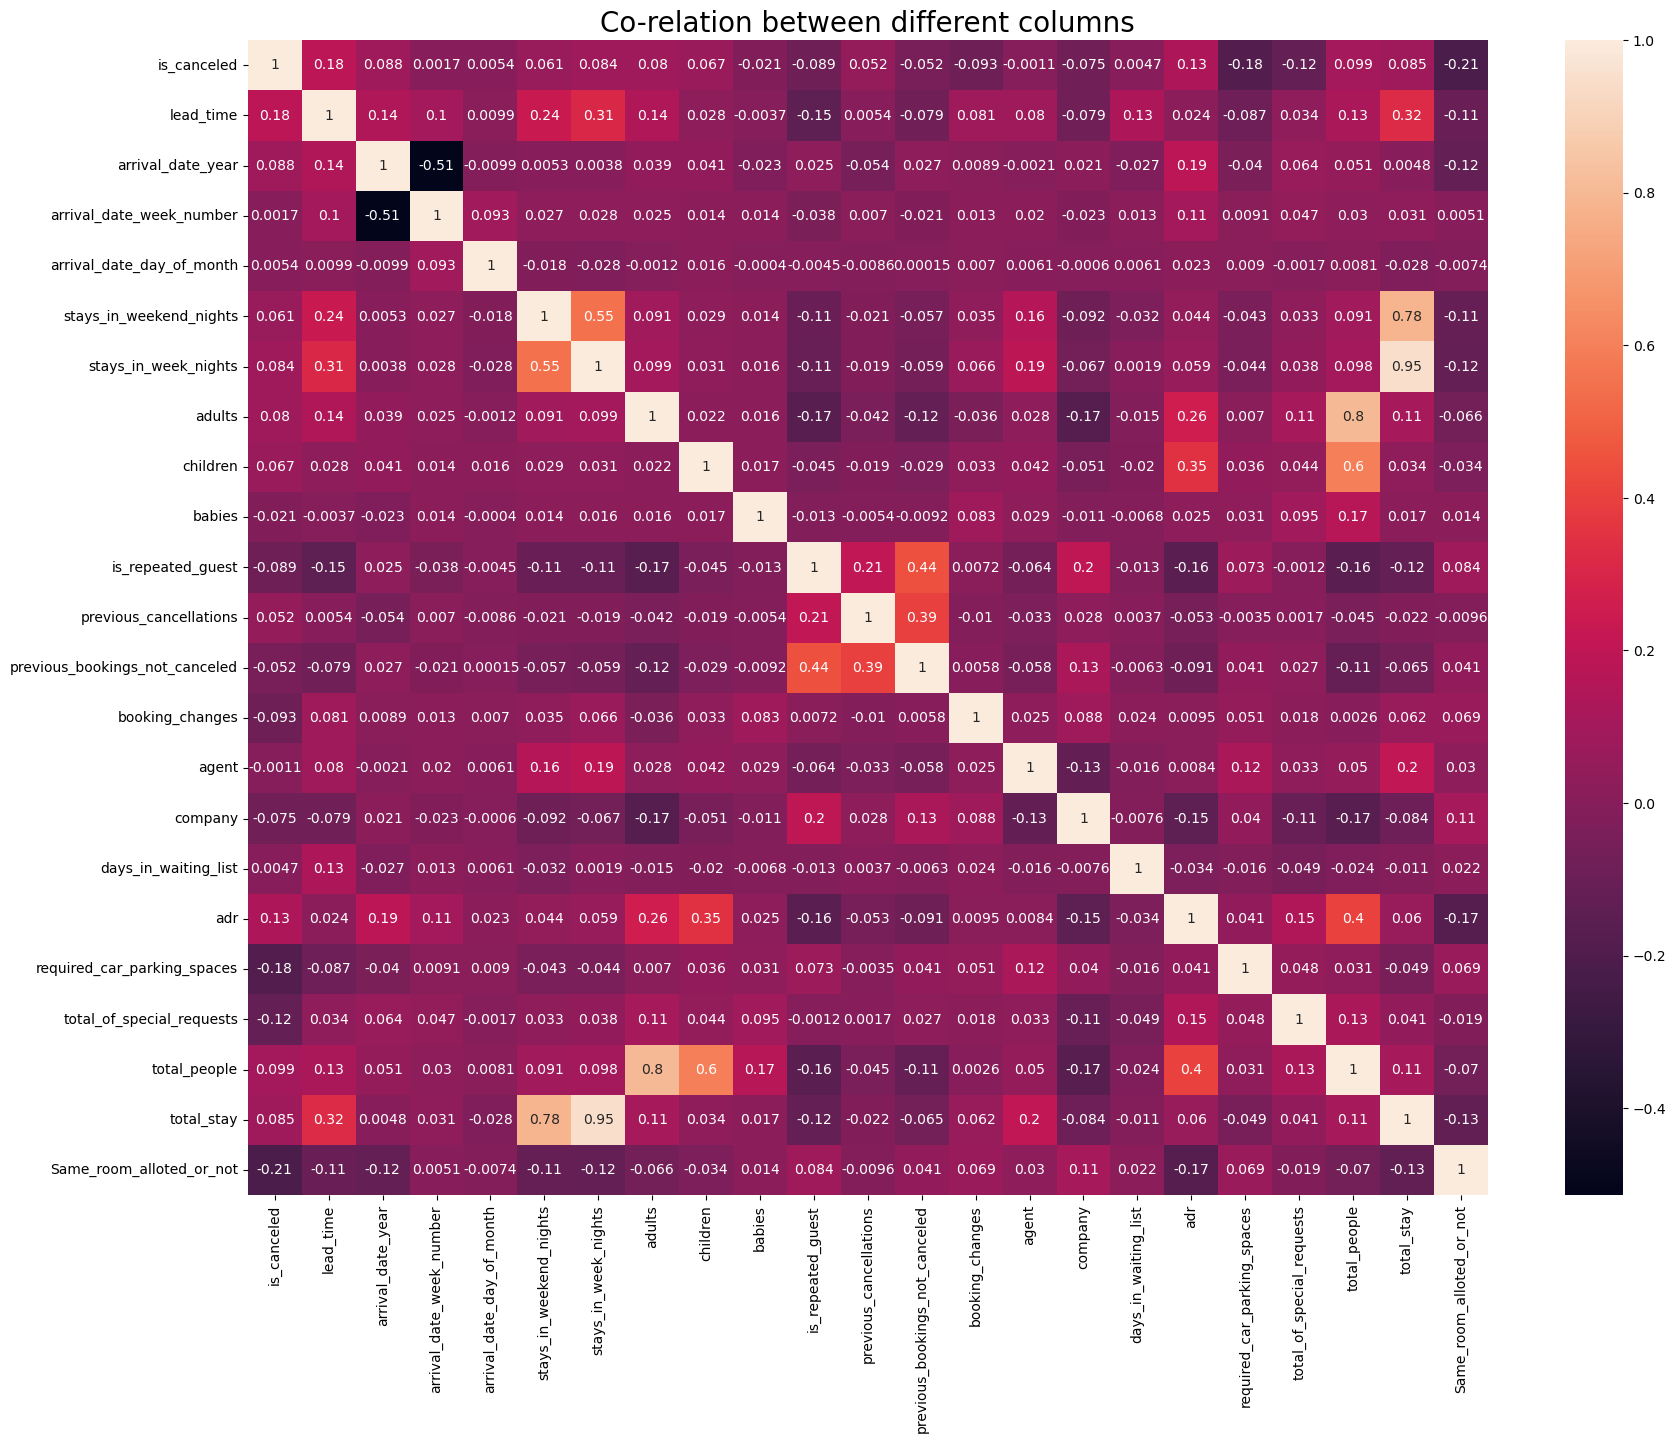

In [83]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation between different columns',fontsize=20)
plt.show()

<b>Observations:</b>
* 'is_canceled' and 'same_room_alloted_or_not' are negatively corelated. So, even if he doesn't get the exact accommodation he reserved, the customer is unlikely to change his reservations. It is already proven, to the last analysis.
* Total people and adr are positively Correlated that means more number of people increases the adr.
* "is_repeted guest" and "previous_bookings_not_canceled" have a stong positive correlation.
* Lead time and total stay have a positive relationship. This implies that the lead time will increase as the customer stays longer.

# Findings :

1. Here we can clearly see that City Hotel is most preferred hotel by the visitors.

2. ‘Agent 9’ who has Most Number of Bookings

3. 27.5 % of the bookings were cancelled.

4. 3.9% of visitors went back to the hotels. 96.1 percent of the visitors were first-timers. The retention rate is consequently low.

5. The percentage of transient customers is higher at 82.4%. A very small fraction of Bookings is connected to the Group.

6. The parking space was not needed by 91.6% of the visitors. 8.3% of visitors only needed one parking space.

7. Above 80% of the bookings were not changed by guests.

8. Preferred Meal Type

* Consequently, bed and breakfast (BB) is the most popular sort of meal among the visitors.
* Almost Equally desirable are HB- (Half Board) and SC- (Self Catering).

9. The majority of visitors almost 98.7% prefer "No deposit" types of deposits which means the customer made no deposit to guarantee the booking.

10. Top ten countries from which the most visitors arrive

* PRT- Portugal
* GBR- United Kingdom
* FRA- France
* ESP- Spain
* DEU - Germany
* ITA - Itlay
* IRL - Ireland
* BEL -Belgium
* BRA -Brazil
* NLD-Netherlands

11. The most preferred Room type is "A".

12. The months with the most bookings were July and August. Bookings may have been made in anticipation of summer vacations.

13. 'TA/TO' distribution method is most popular for hotel reservations

14. In 2016, the majority of reservations for resort hotels and city hotels were made.

15. The majority of the time, guests receive the exact accommodation they have reserved.

16. The highest ADR is at the City Hotel. This indicates that city hotels make more money than resort hotels.

17. City hotel experiences the highest rate of cancellations.

18. Resorts Hotels have a slightly longer average lead time. Customers must make very early travel plans as a result.

19. There is a lengthier wait time at city hotels than at resort hotels. As a result, we can conclude that city hotels are significantly busier than resort hotels.

20. Compared to City Hotels, Resort Hotel has a little bit more repeat visitor.

21. ADR compared between several months.

* In comparison to City Hotels, the ADR for Resort Hotel is higher in the months of July and August. Perhaps clients/people wish to vacation in resort hotels this summer.
* January, February, March, April, October, November, and December are the ideal months for visitors to resort or city hotels because of the low average daily rate throughout these months.

22. ADR across Distribution Channel

* "Direct" and "TA/TO" has almost equal ADR in both type of Hotel which is high among other channels.
* GDS scores highly in the "City Hotel" category. Bookings for Resort Hotels must rise at GDS.
* This indicates that "Direct" and "TA/TO" are outperforming the other channels in terms of revenue generation.

23. If we compare ADR across Different Market Segment we can see that In both types of hotels, "Direct" and "Online TA" are making the most contributions.

24. The ADR rises along with the length of stay. However, the ADR decreases if a guest stays for a longer time.

25. ADR also rises in proportion to the Total number of people.

26. In "TA/TO" type of Distribution Channel has the highest cancellation count.

27. If we compare the Cancellation Count among different market segment then we can find that Online T/A has the highest cancellation in both type of Hotels.

28. The ideal stay in either sort of hotel is under seven days.

29. Booking cancellations are more common among non-repeat visitors.

30. Even if customers are not given the rooms they requested throughout the booking process, there is no appreciable impact on cancellations of reservations.

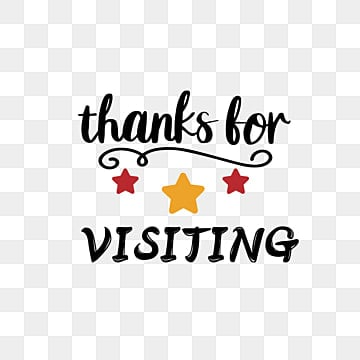